# TP 2 : Optimisation avec contrainte
## EX1
### 1.a
$$
J(x, y) = 2x^2 + 3xy + 2y^2
$$

$$
\nabla J(x, y) = \begin{pmatrix} 4x + 3y \\ 3x + 4y \end{pmatrix}
$$

$$
\begin{cases}
4x + 3y = 0 \\
3x + 4y = 0
\end{cases}
\Rightarrow x = y = 0
$$

min $(0, 0)$, mais ce point n'est pas dans l'ensemble de contraintes $Q$ ($x, y$ sont tous deux inférieurs à $-1/2$).

### 1.b

$$
Q = \{x \le -\tfrac{1}{2},\ y \le -\tfrac{1}{2} \}
$$

$\bar{X}$, $\nabla J(\bar{X}) = 0$ ou $\bar{X} \in \partial Q$。

car $\nabla J(0,0) \ne 0$ et $(0,0) \notin Q$

* $x = -1/2$
* $y = -1/2$
* $x = y = -1/2$

* $J(-0.5, y) = 0.5 + 1.5y + 2y^2$ dans $y \le -0.5$
* $J(x, -0.5) = 2x^2 - 1.5x + 0.5$ dans $x \le -0.5$
* $J(-0.5, -0.5) = 2(0.25) + 3(-0.5)^2 + 2(0.25) = 0.5 + 0.75 + 0.5 = 1.75$

$(x, y) = (-0.5, -0.5)$

### 2

$$
x_{k+1} = P_Q(x_k - \alpha \nabla J(x_k))
$$

$$
P_Q(x, y) = (\min(x, -0.5),\ \min(y, -0.5))
$$

#### Python

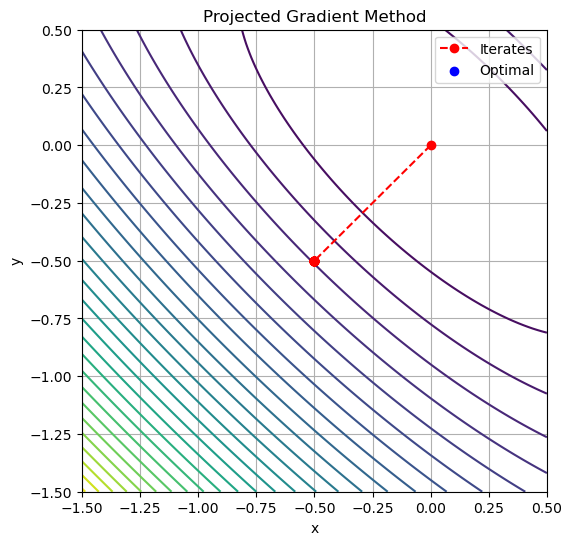

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def grad_J(x):
    return np.array([
        4 * x[0] + 3 * x[1],
        3 * x[0] + 4 * x[1]
    ])

def projection_Q(x):
    return np.minimum(x, -0.5)

def projected_gradient(x0, alpha=0.1, max_iter=100):
    x = x0
    trajectory = [x.copy()]
    for _ in range(max_iter):
        grad = grad_J(x)
        x = projection_Q(x - alpha * grad)
        trajectory.append(x.copy())
    return np.array(trajectory)

x0 = np.array([0.0, 0.0])
trajectory = projected_gradient(x0, alpha=0.1, max_iter=30)

plt.figure(figsize=(6, 6))
X, Y = np.meshgrid(np.linspace(-1.5, 0.5, 100), np.linspace(-1.5, 0.5, 100))
Z = 2*X**2 + 3*X*Y + 2*Y**2
plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro--', label='Iterates')
plt.scatter([-0.5], [-0.5], color='blue', label='Optimal')
plt.xlabel('x'), plt.ylabel('y'), plt.title('Projected Gradient Method')
plt.legend(), plt.grid(True)
plt.show()

### 3

$$
\varphi(x, y) = \frac{1}{2} \left[\max(0,\ x + 0.5)^2 + \max(0,\ y + 0.5)^2\right]
$$

$$
J_\varepsilon(x, y) = J(x, y) + \frac{1}{\varepsilon} \varphi(x, y)
$$

#### Python

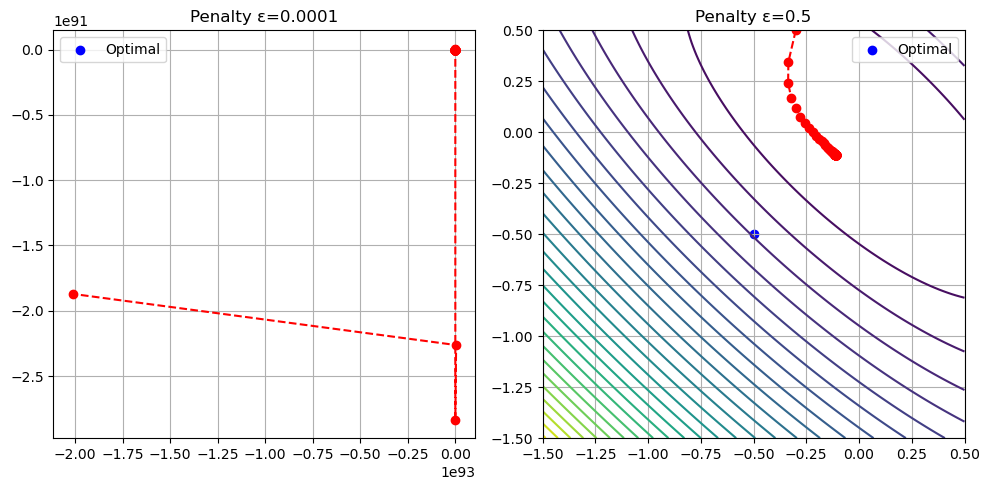

In [2]:
def phi(x):
    return 0.5 * np.maximum(0, x[0] + 0.5)**2 + 0.5 * np.maximum(0, x[1] + 0.5)**2

def grad_phi(x):
    dx = np.maximum(0, x[0] + 0.5)
    dy = np.maximum(0, x[1] + 0.5)
    return np.array([
        dx if dx > 0 else 0,
        dy if dy > 0 else 0
    ])

def penalized_gradient(x0, epsilon=1e-4, alpha=0.05, max_iter=100):
    x = x0
    trajectory = [x.copy()]
    for _ in range(max_iter):
        grad = grad_J(x) + (1 / epsilon) * grad_phi(x)
        x = x - alpha * grad
        trajectory.append(x.copy())
    return np.array(trajectory)

# ε = 1e-4
x0 = np.array([-0.3, 0.5])
trajectory1 = penalized_gradient(x0, epsilon=1e-4)

# ε = 0.5
trajectory2 = penalized_gradient(x0, epsilon=0.5)

#
plt.figure(figsize=(10, 5))

for i, (traj, eps) in enumerate(zip([trajectory1, trajectory2], [1e-4, 0.5])):
    plt.subplot(1, 2, i + 1)
    plt.contour(X, Y, Z, levels=30, cmap='viridis')
    plt.plot(traj[:, 0], traj[:, 1], 'ro--')
    plt.scatter([-0.5], [-0.5], color='blue', label='Optimal')
    plt.title(f'Penalty ε={eps}')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

## EX2
### 1.

$$
\min_{x\in\R^n}\; J(x)=\tfrac12\,x^T A x
\quad\text{s.t.}\quad
\begin{cases}
\langle x, u\rangle = 1,\\
\langle x, e\rangle = r_0,
\end{cases}
$$

$u=(1,\dots,1)^T$，$e=(e_1,\dots,e_n)^T$。

#### 1.1

$C x = f$, et

$$
C = 
\begin{pmatrix}
u^T \\[6pt]
e^T
\end{pmatrix}
\in\R^{2\times n},
\qquad
f = 
\begin{pmatrix}
1\\
r_0
\end{pmatrix}
\in\R^2.
$$

alors, 

$$
K = \{\,x\in\R^n:\;Cx=f\}.
$$

#### 1.2 KKT

$$
\mathcal L(x,\lambda)
= \tfrac12\,x^T A x \;+\;\lambda^T (C x - f).
$$

$$
\begin{cases}
\nabla_x \mathcal L = A x + C^T \lambda = 0,\\
\nabla_\lambda \mathcal L = C x - f = 0.
\end{cases}
$$

$$
\begin{pmatrix}
A & C^T\\
C & 0
\end{pmatrix}
\begin{pmatrix}
x\\
\lambda
\end{pmatrix}
=
\begin{pmatrix}
0\\
f
\end{pmatrix}.
$$

À chaque itération, tant que ce système linéaire est résolu, le courant $(x,\lambda)$ peut être obtenu.

### 2. Générer une matrice $A$

* on a $r_0 = 2.5$, et $e_i = i$，alors

  $$
  e = (1,2,3,4,5)^T,\quad n=5.
  $$
* générer une matrice $A$：

  ```python
  A = np.diag(e)
  R = np.random.rand(n,n)
  A = A + 0.05 * (R.T @ R)
  ```

  * `np.diag(e)` : construit une matrice diagonale avec des éléments diagonaux $e_i$ ;
  * `R.T @ R` : génère une matrice symétrique définie positive aléatoire (car les matrices symétriques $R^T R$ sont semi-définies positives),
  * En multipliant par 0,05 et en l'ajoutant à la matrice diagonale, non seulement on conserve la contribution diagonale d'origine, mais on obtient également une certaine perturbation de « covariance », rendant A plus général.

### 3. Uzawa

#### 3.1

$$
\begin{pmatrix}
A & C^T \\ C & 0
\end{pmatrix},
$$

1. **Primal**（$\lambda^k$）：

   $$
   x^{k+1} \;=\;\arg\min_x\;\mathcal L(x,\lambda^k)
   \;\Longrightarrow\;
   A\,x^{k+1} = -\,C^T \lambda^k.
   $$
2. **Dual**（$\gamma>0$）：

   $$
   \lambda^{k+1}
   = \lambda^k
   \;+\;\gamma\,(C\,x^{k+1}-f).
   $$

#### 3.2 Python

In [3]:
import numpy as np

def uzawa(A, C, f, gamma=0.1, max_iter=500):
    n = A.shape[0]

    x = np.zeros(n)
    lam = np.zeros(C.shape[0])
    for k in range(max_iter):
        # Primal A x = -C^T lam
        x = np.linalg.solve(A, -C.T @ lam)
        # Dual
        lam = lam + gamma * (C @ x - f)
    return x, lam

# test
n = 5
e = np.arange(1, n+1)
r0 = 2.5
C = np.vstack([np.ones(n), e])
f = np.array([1.0, r0])
#
A = np.diag(e)
R = np.random.rand(n,n)
A = A + 0.05*(R.T @ R)

x_star, lam_star = uzawa(A, C, f, gamma=0.01, max_iter=1000)
print("Uzawa x =", x_star)
print("Cx - f =", C @ x_star - f)

Uzawa x = [0.34456288 0.21808055 0.1624183  0.13859881 0.13557577]
Cx - f = [-0.00076369  0.00025296]


### 4.

utile **Augmented Lagrangian** c'est

$$
\mathcal L_\mu(x,\lambda)
= \tfrac12 x^T A x \;+\;\lambda^T(Cx - f)
\;+\;\frac{\mu}{2}\|Cx - f\|^2.
$$


1. **Primal**

   $$
   (A + \mu\,C^T C)\,x^{k+1}
   = -\,C^T \lambda^k \;+\;\mu\,C^T f.
   $$
2. **Dual**：

   $$
   \lambda^{k+1} = \lambda^k + \mu\,(C\,x^{k+1} - f).
   $$


#### 4.1

In [4]:
def aug_uzawa(A, C, f, mu=1.0, max_iter=200):
    n = A.shape[0]
    # compute
    M = A + mu * (C.T @ C)
    x = np.zeros(n)
    lam = np.zeros(C.shape[0])
    for k in range(max_iter):
        # Primal: (A + μ C^T C) x = -C^T lam + μ C^T f
        b = -C.T @ lam + mu * (C.T @ f)
        x = np.linalg.solve(M, b)
        # Dual
        lam = lam + mu * (C @ x - f)
    return x, lam

# test
x_aug, lam_aug = aug_uzawa(A, C, f, mu=10.0, max_iter=200)
print("Uzawa x =", x_aug)
print("Cx - f =", C @ x_aug - f)

Uzawa x = [0.34546052 0.21829881 0.16239877 0.13846396 0.13537795]
Cx - f = [0. 0.]
